# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Rizki Ashuri Pratama
- Email: rizkiashuripratama45@gmail.com
- Id Dicoding: rizki45

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 : Penyewaan sepeda paling banyak dilakukan pada hari apa?
- pertanyaan 2 : Bagaimana hubungan antara suhu dengan penyewaan sepeda?
- pertanyaan 3 : Cuaca apa yang paling mendukung orang untuk menyewa sepeda?

## Menyiapkan semua library yang dibuthkan

In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [19]:
#Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/RizkiAshPrat/ProyekAnalisisDataDicoding/main/data/hour.csv')
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


Setelah dilakukan Gathering data, diketahui bahwa bike sharing dataset memiliki 17.379 data dan 17 kolom

### Assessing Data

In [20]:
def data_overview(df, head=5):
    print(" SHAPE ".center(125,'-'))
    print('Rows:{}'.format(df.shape[0]))
    print('Columns:{}'.format(df.shape[1]))
    print(" INFO COLUMNS AND DATA TYPES ".center(125, '-'))
    print(df.info())
    print(" MISSING VALUES ".center(125,'-'))
    print(df.isnull().sum())
    print(" DUPLICATED VALUES ".center(125,'-'))
    print(df.duplicated().sum())
    print(" HEAD ".center(125,'-'))
    print(df.head(3))

In [21]:
data_overview(df)

----------------------------------------------------------- SHAPE -----------------------------------------------------------
Rows:17379
Columns:17
------------------------------------------------ INFO COLUMNS AND DATA TYPES ------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 1

Setelah dilakukan tahap assesing data terdapat beberapa temuan:
1. Perlu mengubah tipe data kolom (dteday, season, mnth, holiday, weekday,workingday dan weathersit)
2. Dapat menghapus kolom yang tidak terpakai untuk analisis (instant)
3. Tidak terdapat missing values maupun data duplikat di keseluruhan kolom
4. Mengubah nilai kolom (season, yr, mnth, weekday, weathersit, tempt, atemp, hum, windspeed) berdasarkan Readme.txt supaya lebih mudah untuk dilakukan analisis

### Cleaning Data

##### Mengubah tipe data kolom

In [22]:
df['dteday'] = pd.to_datetime(df['dteday'])
df['season'] = df.season.astype('category')
df['mnth'] = df.mnth.astype('category')
df['holiday'] = df.holiday.astype('category')
df['weekday'] = df.weekday.astype('category')
df['workingday'] = df.workingday.astype('category')
df['weathersit'] = df.weathersit.astype('category')

*   Melakukan perubahan tipe data kolom "dteday" menjadi datetime karena berisi tanggal
*   Melakukan perubahan tipe data untuk kolom "season, mnth, holiday, weekday,workingday dan weathersit" menjadi category karena berisi pengkatogorian data, misalkan pada kolom weekday yang berisi kategori hari dalam seminggu (Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday)

In [23]:
data_overview(df)

----------------------------------------------------------- SHAPE -----------------------------------------------------------
Rows:17379
Columns:17
------------------------------------------------ INFO COLUMNS AND DATA TYPES ------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64 

##### Menghapus kolom yang tidak dipakai

In [24]:
#Menghapus kolom instant, karena kolom ini hanya merupakan kolom indexing data
df.drop('instant', axis=1, inplace=True)

In [25]:
data_overview(df)

----------------------------------------------------------- SHAPE -----------------------------------------------------------
Rows:17379
Columns:16
------------------------------------------------ INFO COLUMNS AND DATA TYPES ------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  category      
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  category      
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  category      
 6   weekday     17379 non-null  category      
 7   workingday  17379 non-null  category      
 8   weathersit  17379 non-null  category      
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64 

##### Pengubahan nilai kolom berdasarkan Readme.txt

In [26]:
#Mengubah nilai kolom "season" : 1:Winter, 2:Spring, 3:Summer, 4:Fall
df.season.replace((1,2,3,4), ('Winter','Spring','Summer','Fall'), inplace=True)

#Mengubah nilai kolom "yr": 0:2011, 1:2012
df.yr.replace((0,1), (2011, 2012), inplace=True)

#Mengubah nilai kolom "mnth":  1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

#Mengubah nilai kolom "holiday"0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

#Mengubah nilai kolom "workingday" : 0:No, 1:Yes
df.workingday.replace((0,1), ('No', 'Yes'), inplace=True)

#Mengubah nilai kolom "weathersit": 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
df.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_RainSnow','Heavy_RainSnow'), inplace=True)

#Mengubah nilai kolom "temp" * 41 (Sebelum di Normalized)
df['temp'] = df['temp']*41

#Mengubah nilai kolom "atemp" * 50 (Sebelum di Normalized)
df['atemp'] = df['atemp']*50

#Mengubah nilai kolom "hum" * 100 (Sebelum di Normalized)
df['hum'] = df['hum']*100

#Mengubah nilai kolom "windspeed" * 67 (Sebelum di Normalized)
df['windspeed'] = df['windspeed']*67

In [27]:
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Winter,2011,Jan,0,0,Saturday,No,Clear,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01,Winter,2011,Jan,1,0,Saturday,No,Clear,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01,Winter,2011,Jan,2,0,Saturday,No,Clear,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01,Winter,2011,Jan,3,0,Saturday,No,Clear,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01,Winter,2011,Jan,4,0,Saturday,No,Clear,9.84,14.395,75.0,0.0,0,1,1


#### Save Hasil Cleaning Data untuk Dashboard

In [28]:
df.to_csv('main_data.csv', index=False)

## Exploratory Data Analysis (EDA)

### Korelasi Antar Kolom

<ipython-input-29-f93e4c57e129>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


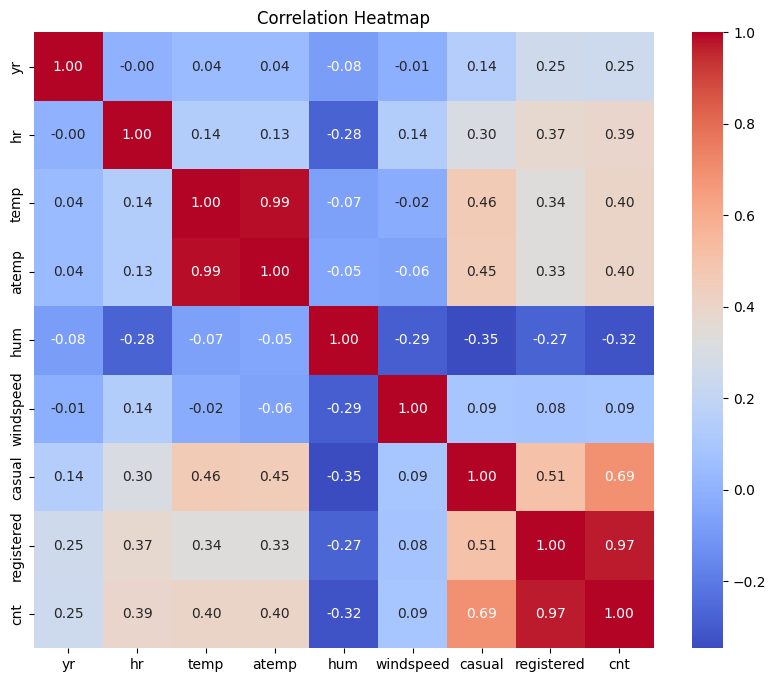

In [29]:
# Menghitung korelasi antar kolom
correlation_matrix = df.corr()

# Menentukan ukuran gambar
plt.figure(figsize=(10, 8))

# Membuat heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Menampilkan plot
plt.title('Correlation Heatmap')
plt.show()

Terdapat beberapa korelasi yang berarti dari heatmap yang disajikan:
1.   Korelasi antara kolom lain dengan cnt mostly memiliki korelasi yang positif kecuali kolom hum
2. Terdapat korelasi tinggi antara cnt dengan registered dan casual, karena cnt merupakan hasil penjumlahan registered dan casual






### Bike Rentals by WeekDay

In [30]:
weekly_df = df.groupby(by='weekday').cnt.count().reset_index()
weekly_df_sort = weekly_df.sort_values(by='cnt', ascending=False)
weekly_df_sort

,weekday,cnt
6,Saturday,2512
0,Sunday,2502
5,Friday,2487
1,Monday,2479
3,Wednesday,2475
4,Thursday,2471
2,Tuesday,2453


Didapatkan bahwa bike rentals paling banyak dilakukan pada hari Friday dan yang paling sedikit adalah hari Sunday, dimana urutan dari yang paling banyak hingga paling sedikit adalah: Friday, Thursday, Saturday, Wednesday, Tuesday, Monday dan Sunday

### Bike Rentals by Type of User

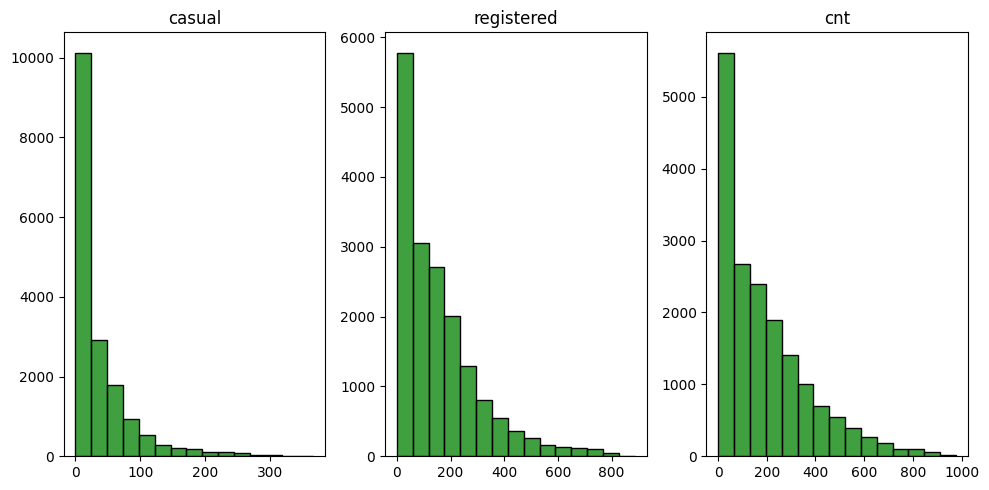

In [31]:
columns = ['casual', 'registered', 'cnt']

fig, ax = plt.subplots(1, 3, figsize=(10,5))

for i, ax in enumerate(ax):
    sns.histplot(x=df[columns[i]], ax=ax, bins=15, color='green')
    ax.set_title(columns[i])
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()

In [32]:
type_user_df = df.groupby(by='mnth')[['casual', 'registered']].sum().reset_index()
type_user_df.sort_values(by='mnth')
type_user_df

,mnth,casual,registered
0,Jan,12042,122891
1,Feb,14963,136389
2,Mar,44444,184476
3,Apr,60802,208292
4,May,75285,256401
5,Jun,73906,272436
6,Jul,78157,266791
7,Aug,72039,279155
8,Sep,70323,275668
9,Oct,59760,262592


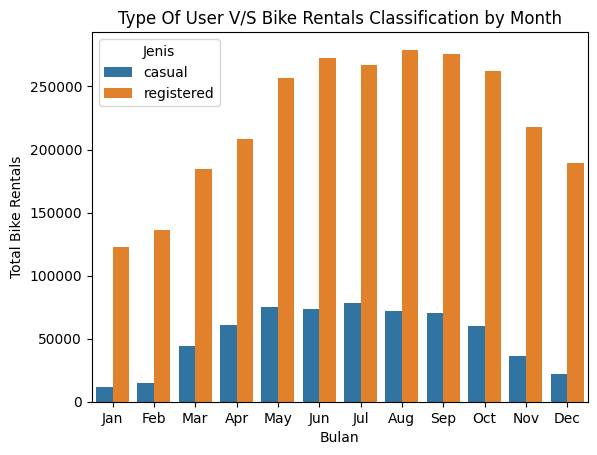

In [33]:
ax = sns.barplot(x='mnth', y='amount', hue='Jenis',  data=pd.melt(type_user_df, id_vars='mnth', value_name='amount', var_name='Jenis'))
ax.set(xlabel='Bulan', ylabel='Total Bike Rentals')
plt.title('Type Of User V/S Bike Rentals Classification by Month')
plt.show()

Didapatkan bahwa:

1.   Antara 2 tipe user (casual dan registered) lebih banyak tipe pengguna registered yang melakukan penyewaan sepeda dibandingkan tipe casual.
2.   Penyewaan sepeda paling banyak untuk tipe casual pada bulan Juli, sedangkan tipe registered pada bulan Agustus
3.   Penyewaan sepeda paling sedikit baik antara tipe casual dan tipe registered sama terjadi pada bulan Januari



### Bike Rentals by Weathersit

In [34]:
weathersit_df = df.groupby(by='weathersit')['cnt'].sum().reset_index()
weathersit_df

,weathersit,cnt
0,Clear,2338173
1,Misty,795952
2,Light_RainSnow,158331
3,Heavy_RainSnow,223


In [35]:
weathersit_df = df.groupby(by='weathersit')[['casual', 'registered']].sum().reset_index()
weathersit_df

,weathersit,casual,registered
0,Clear,462745,1875428
1,Misty,134481,661471
2,Light_RainSnow,22783,135548
3,Heavy_RainSnow,8,215


Penyewaan sepeda paling banyak terjadi pada weather Clear, sedangkan yang paling sedikit terjadi pada weather Heavy Rain Snow. Hal ini terjadi pada kedua tipe pengguna, yaitu baik casual maupun registered



## Visualization & Explanatory Analysis

### Pertanyaan 1: Penyewaan sepeda paling banyak dilakukan pada hari apa?

Text(0.5, 1.0, 'Total bike rentals V/S Hari dalam Weekday')

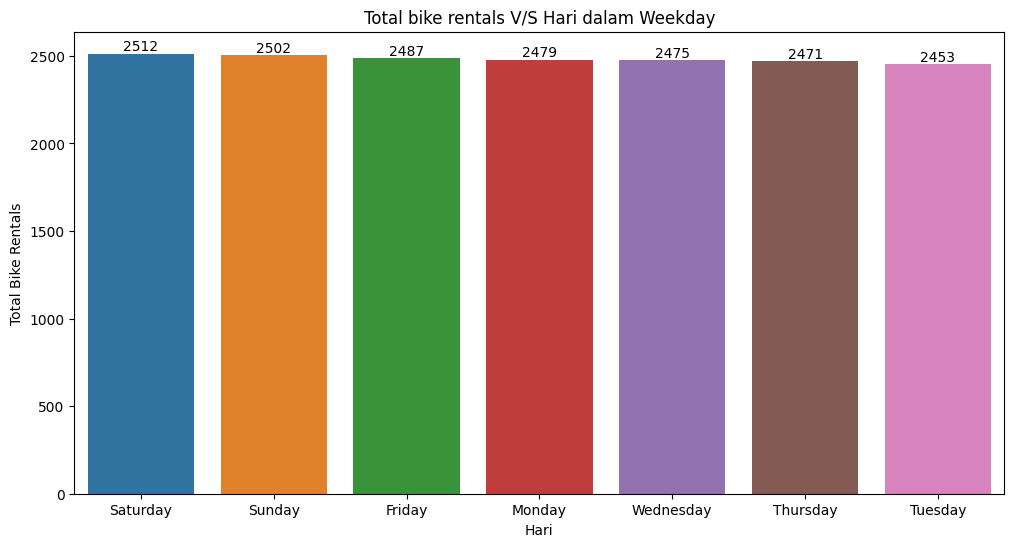

In [36]:
plt.figure(figsize=(12,6))
ax=sns.barplot(x='weekday', y='cnt', data=weekly_df_sort, order=weekly_df_sort['weekday'])
ax.set(xlabel='Hari', ylabel='Total Bike Rentals')
for label in ax.containers:
    ax.bar_label(label)
plt.title('Total bike rentals V/S Hari dalam Weekday')

*   Total penyewaan sepeda paling banyak dilakukan pada hari Saturday dengan Total rata-ratanya sebesar 2512
*   Dari 2 Total penyewaan sepeda yang tertinggi yaitu Saturday dan Sunday maka dapat disimpulkan bahwa Weekend sangat mempengaruhi penyewaan sepeda


### Pertanyaan 2: Bagaimana hubungan antara suhu dengan penyewaan sepeda?

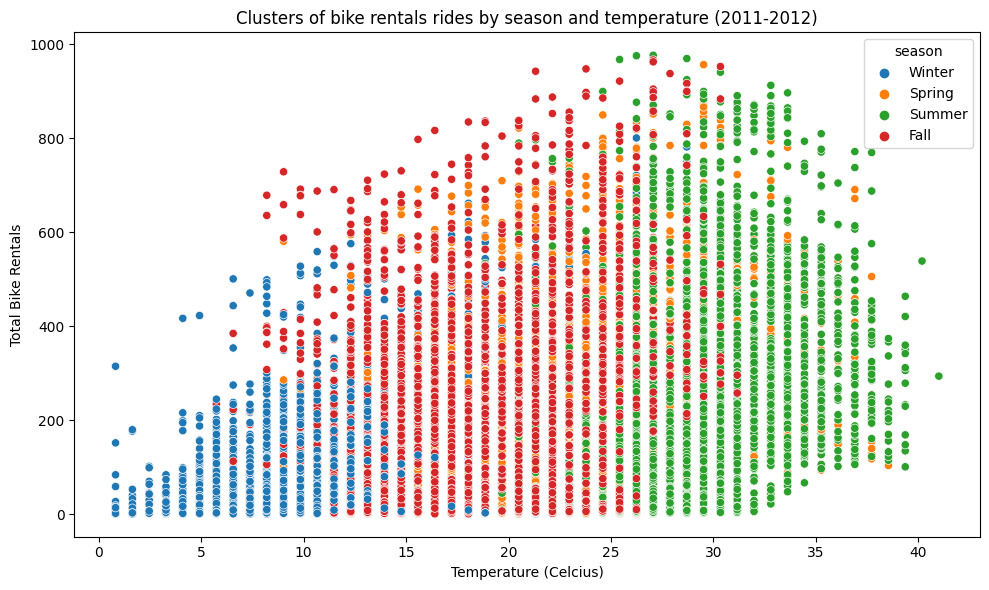

In [37]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='temp', y='cnt', data=df, hue='season')
plt.xlabel("Temperature (Celcius)")
plt.ylabel("Total Bike Rentals")
plt.title("Clusters of bike rentals rides by season and temperature (2011-2012)")
plt.tight_layout()
plt.show()

Didapatkan bahwa:

1.   Penyewaan sepeda yang dominan sedikit terjadi pada season winter
2.   Semakin tinggi temperaturnya maka penyewaan sepeda juga akan semakin tinggi. Penyewaan sepeda tertinggi terjadi pada season summer
3.   Penyewaan sepeda yang tinggi terletak pada temperatur 20 - 30 derajat Celcius



### Pertanyaan 3 : Cuaca apa yang paling mendukung orang untuk menyewa sepeda?

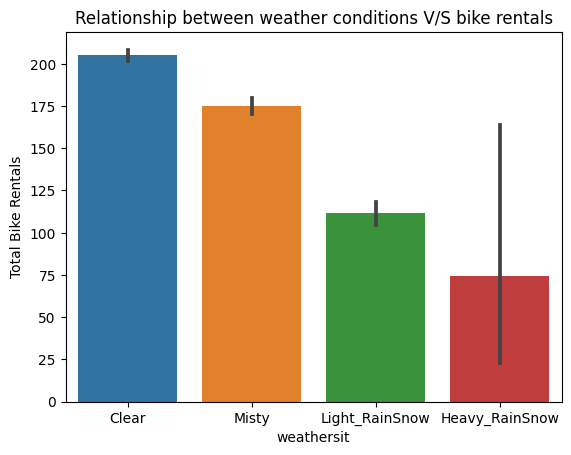

In [38]:
sns.barplot(x='weathersit', y='cnt', data=df)
plt.title('Relationship between weather conditions V/S bike rentals')
plt.ylabel("Total Bike Rentals")
plt.show()

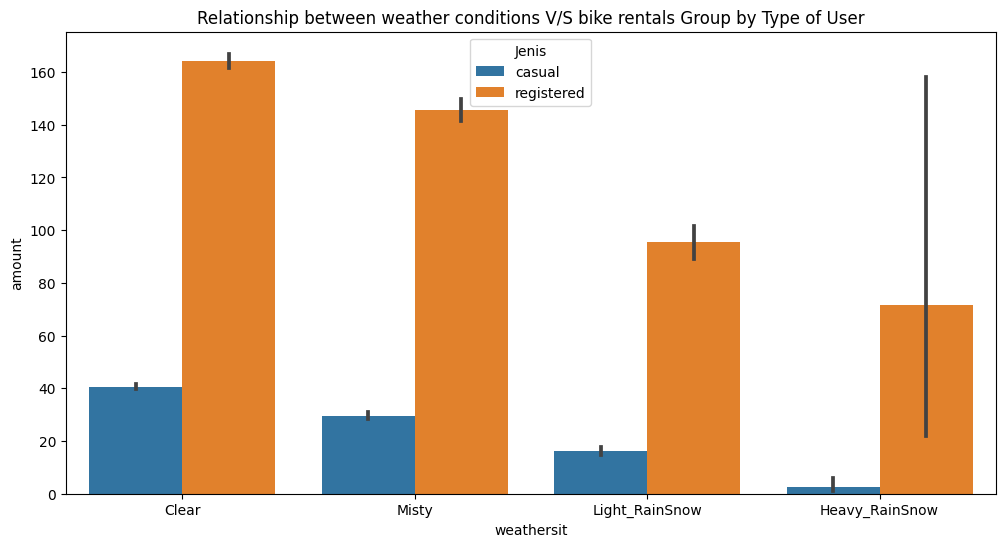

In [39]:
df_weather_by_user = df[['weathersit', 'casual', 'registered']]

plt.figure(figsize=(12,6))
ax = sns.barplot(x='weathersit', y='amount', hue='Jenis',  data=pd.melt(df_weather_by_user, id_vars='weathersit', value_name='amount', var_name='Jenis'))
plt.title('Relationship between weather conditions V/S bike rentals Group by Type of User')
plt.show()


*   Cuaca yang paling banyak penyewa sepeda adalah Clear baik antara tipe pengguna casual maupun registered
*   Semakin lembab cuacanya maka akan semakin rendah penyewaan sepedanya baik antara tipe pengguna casual maupun registered



## Conclusion

- Conclution pertanyaan 1: Penyewaan sepeda paling banyak dilakukan pada hari apa?
Weekend menjadi salah satu faktor yang menyebabkan penyewaan sepeda meningkat, hal tersebut dapat dilihat dari hari penyewaan sepeda tertinggi terjadi pada hari Saturday dan Sunday

- Conclution pertanyaan 2: Bagaimana hubungan antara suhu dengan penyewaan sepeda?
Temperatur dapat menjadi faktor yang mempengaruhi penyewaan sepeda, karena ketika temperaturnya kian meningkat justru penyewaan sepedanya akan semakin meningkat pula. Dimana penyewaan sepeda terbanyak terjadi pada rentang 20 hingga 30 derajat celcius

- Concluion pertanyaan 3: Cuaca apa yang paling mendukung orang untuk menyewa sepeda?
Cuaca yang paling mendukung untuk seseorang menyewa sepeda adalah cuaca Clear, bahkan memiliki perbedaan yang begitu jauh dengan cuaca heavy rain snow